# CSE4502 Programming Assignment #1

## Follow the chapter 2 of the textbook and finish the code as an end-to-end machine learning project

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston.data.ndim

2

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target.ndim

1

In [9]:
boston.target.shape

(506,)

In [10]:
housing = np.c_[boston.data, boston.target]

In [11]:
housing = pd.DataFrame(housing)

In [12]:
housing.columns = list(boston.feature_names) + ['MEDV']

In [13]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# Inital Inspection of the Data

We'll make some plots in the same way as the California data example from class.

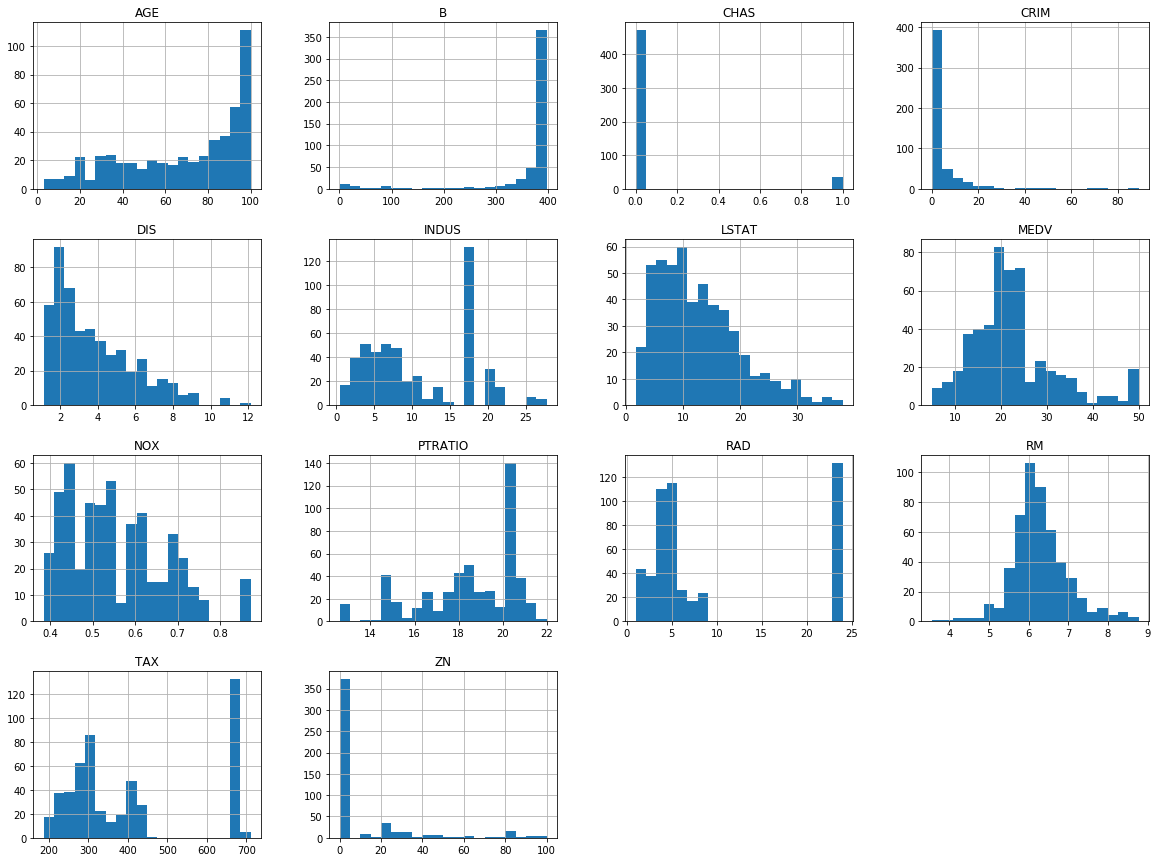

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=20, figsize=(20,15));

Looking at the data it looks like there are a number of columns that are capped (B and Age for example RAD too probably.). 


## Some observations 
RM seems intresting to me. It's a normal(ish) distribution, and we learned that ML algos tend to work well on those, so I'm going to assume that that will end up being a valuable column. 

NOX is totaly random by the looks of it. My guess is that it'll end up being useless. The case against that would be: higher NOX means more polution, I'll assume the largest source of polution is cars. That means that you're dealing with more busy parts of town, making the propery in that area more valuable. Based on these assumptions, this column should have some kind of relationship with rad, medv and tax.

I have no idea if I want to use this feature or not. 

Besides those DIS and LSTAT look useful, based purely on the shape of the data.


## Looking at what other info we have:



In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Everything is a float64, so no catagorical data is included in this dataset. 

Additionally, it looks like we have 506 down the line. (No missing data! Yay!) 

# Split the Data

I think this is enough information to get started. I don't want to get too much more in depth without splitting the dataset. 

I know that a random split is generally okay, but we're dealing with a pretty small data set. Stratified sampling seems like a really good idea in this case. 

There isn't a column as meaningful as family income in this dataset. But we do have RM, which happens to be a normal distribution. I will stratify based on that column. 


In [16]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
RV = 42 #Just setting this var up so we can refer to it whenever we need a seed.

housing['RM'].describe()

#train_dat, test_dat = train_test_split(housing, train_size=.8, test_size=.2, random_state=RV)

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [17]:
housing['RM_CAT'] = np.round_(housing['RM'])

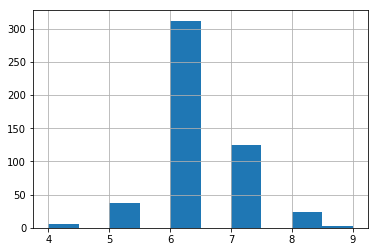

In [18]:
housing['RM_CAT'].hist() 

In [19]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=RV)

for train_ind, test_ind in splitter.split(housing, housing["RM_CAT"]):
    train_dat = housing.loc[train_ind]
    test_dat = housing.loc[test_ind]

both_data_sets = (train_dat, test_dat)
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 275 to 25
Data columns (total 15 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
MEDV       404 non-null float64
RM_CAT     404 non-null float64
dtypes: float64(15)
memory usage: 50.5 KB


Looks like we have 404 rows of training data. This means 102 rows of testing data.

## Detailed Visualization of Data

I'm going to start looking at these columns in a bit more detail now. I don't have to worry about me making myself become biased anymore, since the data is split up. 



In [20]:
train_dat.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.601535   10.532178   11.336114    0.076733    0.554443    6.283225   
std      8.696291   22.918811    6.797741    0.266497    0.112941    0.693007   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083545    0.000000    5.560000    0.000000    0.460000    5.894000   
50%      0.274475    0.000000    9.900000    0.000000    0.538000    6.209000   
75%      3.543428    0.000000   18.100000    0.000000    0.624000    6.626000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.748762    3.719730    9.492574  406.613861   18.461386  357.260792   
std     27.878169    2.024586    8.665407  168.067986    2.123026   89.582270   
min      6.000000    1.129600    1.000000  187.000000   12.600000    2.520000   
25%     46.475000    2.070275    4.000000  279.000000   17.375000  375.782500   
50%     79.850000    3.122200    5.000000  329.000000   18.950000  391.385000   
75%     94.525000    4.978850   24.000000  666.000000   20.200000  396.307500   
max    100.000000   12.126500   24.000000  711.000000   21.200000  396.900000   

            LSTAT        MEDV      RM_CAT  
count  404.000000  404.000000  404.000000  
mean    12.692723   22.582178    6.262376  
std      7.056772    9.139847    0.725618  
min      1.730000    5.000000    4.000000  
25%      7.170000   16.775000    6.000000  
50%     11.645000   21.200000    6.000000  
75%     16.992500   25.000000    7.000000  
max     37.970000   50.000000    9.000000

I want to make sure that the training data is like the housing data. 

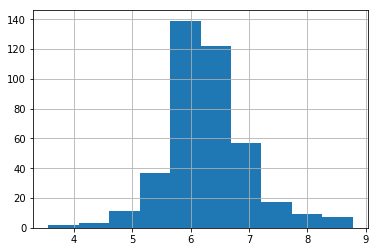

In [21]:
train_dat["RM"].hist()

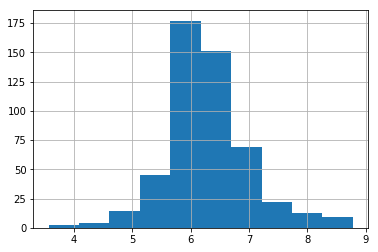

In [22]:
housing["RM"].hist()

In [23]:
at_assumed_cap = sum([1 for val in train_dat["MEDV"] if val == 50])
biggest = max(train_dat["MEDV"])
smallest = min(train_dat["MEDV"])
r = sum([1 for val in train_dat["MEDV"] if val > 50.0])

print("Larger Count:", r)
print("At Assumed Cap count:", at_assumed_cap)
print("Smallest val:", smallest)
print("Largest val:", biggest)

Larger Count: 0
At Assumed Cap count: 12
Smallest val: 5.0
Largest val: 50.0


This takes the sum of a list which has a 1 for each data point that is greater than 50.0. Since the output is 0, we know that there is no datapoint greater than 50.0. I'll assume this is capped. 

The graph didn't make it easy to tell. (At least in my opinion.)

### Returning Data to Original Form

Now that I split the data, there's no real point in me keeping the new column I created to do stratify.
I will remove it. 

In [24]:
for DS in both_data_sets:
    DS.drop("RM_CAT", axis=1, inplace=True)

I don't have anything for location data other than "It's in Boston" so I won't make any scatter plots. 

I'll just jump right into searching for correlations

In [25]:
cor_vals = train_dat.corr()

cor_vals

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.186972  0.392698 -0.069476  0.410388 -0.193988  0.336536   
ZN      -0.186972  1.000000 -0.515214 -0.059517 -0.510278  0.322085 -0.566505   
INDUS    0.392698 -0.515214  1.000000  0.052380  0.764797 -0.393224  0.632449   
CHAS    -0.069476 -0.059517  0.052380  1.000000  0.071822  0.090679  0.084730   
NOX      0.410388 -0.510278  0.764797  0.071822  1.000000 -0.317064  0.719143   
RM      -0.193988  0.322085 -0.393224  0.090679 -0.317064  1.000000 -0.268113   
AGE      0.336536 -0.566505  0.632449  0.084730  0.719143 -0.268113  1.000000   
DIS     -0.376158  0.669535 -0.715957 -0.103510 -0.770328  0.240672 -0.731353   
RAD      0.618572 -0.291336  0.574704 -0.044345  0.593388 -0.179203  0.435223   
TAX      0.577363 -0.301915  0.709787 -0.071026  0.667687 -0.262666  0.496628   
PTRATIO  0.289627 -0.435787  0.389490 -0.150446  0.225609 -0.323452  0.299086   
B       -0.426193  0.164835 -0.344039  0.043634 -0.356716  0.133094 -0.266442   
LSTAT    0.423194 -0.403123  0.588447 -0.060068  0.566845 -0.601695  0.601494   
MEDV    -0.365859  0.355351 -0.473974  0.186585 -0.436403  0.661824 -0.397703   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.376158  0.618572  0.577363  0.289627 -0.426193  0.423194 -0.365859  
ZN       0.669535 -0.291336 -0.301915 -0.435787  0.164835 -0.403123  0.355351  
INDUS   -0.715957  0.574704  0.709787  0.389490 -0.344039  0.588447 -0.473974  
CHAS    -0.103510 -0.044345 -0.071026 -0.150446  0.043634 -0.060068  0.186585  
NOX     -0.770328  0.593388  0.667687  0.225609 -0.356716  0.566845 -0.436403  
RM       0.240672 -0.179203 -0.262666 -0.323452  0.133094 -0.601695  0.661824  
AGE     -0.731353  0.435223  0.496628  0.299086 -0.266442  0.601494 -0.397703  
DIS      1.000000 -0.488607 -0.554597 -0.313341  0.289918 -0.474836  0.275073  
RAD     -0.488607  1.000000  0.912286  0.463530 -0.436813  0.432001 -0.338365  
TAX     -0.554597  0.912286  1.000000  0.456316 -0.436422  0.499246 -0.428505  
PTRATIO -0.313341  0.463530  0.456316  1.000000 -0.183030  0.373723 -0.479082  
B        0.289918 -0.436813 -0.436422 -0.183030  1.000000 -0.356677  0.313810  
LSTAT   -0.474836  0.432001  0.499246  0.373723 -0.356677  1.000000 -0.739402  
MEDV     0.275073 -0.338365 -0.428505 -0.479082  0.313810 -0.739402  1.000000

That chart above is complicated. 

I'll look at what corrs exist between MEDV and everything else, considering MEDV is our label. 

In [26]:
cor_vals['MEDV'].sort_values()[::-1]

MEDV       1.000000
RM         0.661824
ZN         0.355351
B          0.313810
DIS        0.275073
CHAS       0.186585
RAD       -0.338365
CRIM      -0.365859
AGE       -0.397703
TAX       -0.428505
NOX       -0.436403
INDUS     -0.473974
PTRATIO   -0.479082
LSTAT     -0.739402
Name: MEDV, dtype: float64

So based on this, my guess about RM being valuable was right! It has the highest corr of any value. LSTAT also seems very valuable. Probably even more so, considering the absolute value is ~.73

All told these corrs are pretty high. Unlike with the california data set, we only have one thing that has a value of .1, and even that is pretty close to .2. 

For now, I'll train on this as is. If it turns out that we get poor results, I'll start looking for combos. 

The next thing I want to do is look at RM and LSTAT in relation to MEDV (our label) in a bit more detail.

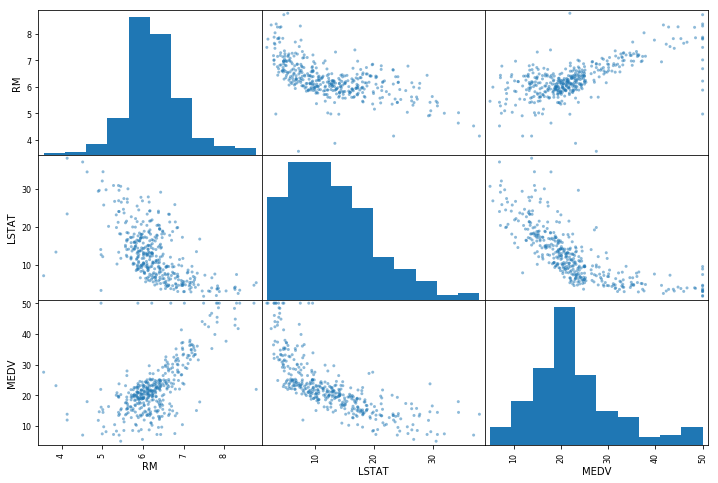

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["RM", "LSTAT", "MEDV"]
scatter_matrix(train_dat[attributes], figsize=(12, 8));

**Graph 0,2** This is RM and MEDV. The relationship is pretty visible. I'd even say it looks linear. There seems to be a cap causing a vertical line. This seems to be due to the fact that MEDV can only be 50 at most. (I verified this earlier with my sum) 

**Graph 1,2** LSTAT v. MEDV. This looks more like a exponential decay function. I don't think it's far off enough that a linear model would be too in accurate. I would say for the range of 20-30 for MEDV, we may see slightly inaccurate predictions.


I'll pull the labels off the training set now


In [28]:
train_dat.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
t_labels = train_dat["MEDV"].copy()
train_dat.drop("MEDV", axis=1)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
275   0.09604  40.0   6.41   0.0  0.447  6.854   42.8  4.2673   4.0  254.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
460   4.81213   0.0  18.10   0.0  0.713  6.701   90.0  2.5975  24.0  666.0   
417  25.94060   0.0  18.10   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
236   0.52058   0.0   6.20   1.0  0.507  6.631   76.5  4.1480   8.0  307.0   
182   0.09103   0.0   2.46   0.0  0.488  7.155   92.2  2.7006   3.0  193.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
98    0.08187   0.0   2.89   0.0  0.445  7.820   36.9  3.4952   2.0  276.0   
426  12.24720   0.0  18.10   0.0  0.584  5.837   59.7  1.9976  24.0  666.0   
179   0.05780   0.0   2.46   0.0  0.488  6.980   58.4  2.8290   3.0  193.0   
254   0.04819  80.0   3.64   0.0  0.392  6.108   32.0  9.2203   1.0  315.0   
120   0.06899   0.0  25.65   0.0  0.581  5.870   69.7  2.2577   2.0  188.0   
138   0.24980   0.0  21.89   0.0  0.624  5.857   98.2  1.6686   4.0  437.0   
122   0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869   2.0  188.0   
108   0.12802   0.0   8.56   0.0  0.520  6.474   97.1  2.4329   5.0  384.0   
92    0.04203  28.0  15.04   0.0  0.464  6.442   53.6  3.6659   4.0  270.0   
301   0.03537  34.0   6.09   0.0  0.433  6.590   40.4  5.4917   7.0  329.0   
344   0.03049  55.0   3.78   0.0  0.484  6.874   28.1  6.4654   5.0  370.0   
271   0.16211  20.0   6.96   0.0  0.464  6.240   16.3  4.4290   3.0  223.0   
339   0.05497   0.0   5.19   0.0  0.515  5.985   45.4  4.8122   5.0  224.0   
363   4.22239   0.0  18.10   1.0  0.770  5.803   89.0  1.9047  24.0  666.0   
347   0.01870  85.0   4.15   0.0  0.429  6.516   27.7  8.5353   4.0  351.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
408   7.40389   0.0  18.10   0.0  0.597  5.617   97.9  1.4547  24.0  666.0   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
208   0.13587   0.0  10.59   1.0  0.489  6.064   59.1  4.2392   4.0  277.0   
114   0.14231   0.0  10.01   0.0  0.547  6.254   84.2  2.2565   6.0  432.0   
240   0.11329  30.0   4.93   0.0  0.428  6.897   54.3  6.3361   6.0  300.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
273   0.22188  20.0   6.96   1.0  0.464  7.691   51.8  4.3665   3.0  223.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
413  28.65580   0.0  18.10   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
322   0.35114   0.0   7.38   0.0  0.493  6.041   49.9  4.7211   5.0  287.0   
308   0.49298   0.0   9.90   0.0  0.544  6.635   82.5  3.3175   4.0  304.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176   72.5  2.7301   6.0  432.0   
70    0.08826   0.0  10.81   0.0  0.413  6.417    6.6  5.2873   4.0  305.0   
146   2.15505   0.0  19.58   0.0  0.871  5.628  100.0  1.5166   5.0  403.0   
462   6.65492   0.0  18.10   0.0  0.713  6.317   83.0  2.7344  24.0  666.0   
286   0.01965  80.0   1.76   0.0  0.385  6.230   31.5  9.0892   1.0  241.0   
432   6.44405   0.0  18.10   0.0  0.584  6.425   74.8  2.2004  24.0  666.0   
255   0.03548  80.0   3.64   0.0  0.392  5.876   19.1  9.2203   1.0  315.0   
149   2.73397   0.0  19.58   0.0  0.871  5.597   94.9  1.5257   5.0  403.0   
421   7.02259   0.0  18.10   0.0  0.718  6.006   95.3  1.8746  24.0  666.0   
87    0.07151   0.0   4.49   0.0  0.449  6.121   56.8  3.7476   3.0  247.0   
400  25.04610   0.0  18.10   0.0  0.693  5.987  100.0  1.5888  24.0  666.0   
167   1.80028   0.0  19.58   0.0  0.605  5.877   79.2  2.4259   5.0  403.0   
88    0.05660   0.0   3.41   0.0  0.489  7.007   86.3  3.4217   2.0  270.0   
427  37.66190   0.0  18.10   0.0  0.679  6.202   78.7  1.8629  24.0  666.0   
317   0.24522   0.0   9.90   0.

# Training 

## Linear Model 

In [30]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()

linear_regressor.fit(train_dat, t_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
from sklearn.metrics import mean_squared_error

housing_predictions = linear_regressor.predict(train_dat)
lin_mse = mean_squared_error(t_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.183093947122824e-14

In [32]:
#Just want to get the range of our label. 
max(t_labels) - min(t_labels)

45.0

**Check:** The range for our label is 45. This amount of error seems incorrect. 

I skipped feature scaling by mistake, so my assumption is that if I do this again, but this time I scale, I may see a better result. 

In [33]:
#Clear out old model if it's here. 
if linear_regressor: 
    linear_regressor = LinearRegression()

#This is the pipeline and scaler we used in class. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#We don't have any missing data or any attributes to combine, so I will skip
#the imputer and the CombinedAdder
scale_line = Pipeline([("std_scaler", StandardScaler())])

housing_ready = scale_line.fit_transform(train_dat)

*Models*  I will train two models now. The first will be linear reg on the full, transformed data set. The second will be cross validated. 

In [36]:
import math 
from sklearn.model_selection import cross_val_score

some_data = test_dat.iloc[:60]
some_labels = t_labels.iloc[:60]
some_data_prepared = scale_line.transform(some_data)

linear_regressor_full_set = LinearRegression()

#In full set, I will fit the full transformed training set and test. 
linear_regressor_full_set.fit(housing_ready, t_labels)

h_pred = linear_regressor_full_set.predict(housing_ready)
lrfs_rmse = np.sqrt(mean_squared_error(t_labels, h_pred))


some_re = linear_regressor_full_set.predict(some_data_prepared)

print(np.sqrt(mean_squared_error(some_re, some_labels)))

#Here I cross validate
lin_pred_set = cross_val_score(linear_regressor, housing_ready, t_labels, scoring="neg_mean_squared_error", cv=10)
lin_pred_set = np.sqrt(-lin_pred_set)

#PRINT results 
print("Full set result, no cross val:", lrfs_rmse, "\n\n")

print("Cross Validated result")
print("Mean:", lin_pred_set.mean())
print("STD DEV:", lin_pred_set.std())
for val in sorted(lin_pred_set):
    print("Score:", val)
    


7.870069885331393
Full set result, no cross val: 1.799026716385697e-14 


Cross Validated result
Mean: 4.313402808500703e-14
STD DEV: 3.159344912687722e-14
Score: 1.639645682759909e-14
Score: 1.8113178917059777e-14
Score: 1.8341239729147345e-14
Score: 2.229569046583976e-14
Score: 2.28229020003468e-14
Score: 3.9366570444497945e-14
Score: 5.3480279311097664e-14
Score: 5.5133277456023454e-14
Score: 6.106315452634392e-14
Score: 1.2432753117211456e-13


I suppose that I technically saw an improvement? 

It seems like I'm overfitting the data. 

I'm going to try a few other models just to see what happens. 

The other thing I may try is using min-max scaling instead of standard scaling. 

## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=RV)
dtr.fit(housing_ready, t_labels)

#This SHOULD overfit and get 0. 
pred = dtr.predict(housing_ready)
tree_rmse = np.sqrt(mean_squared_error(t_labels, pred))
tree_rmse

This is unexpected. It's not 0. But I do think it's still over fitting. It's a few orders of magnitude smaller than the linear model, and the linear model is

I'll cross validate anyway

In [ ]:
score_set = cross_val_score(dtr, housing_ready, t_labels, scoring="neg_mean_squared_error", cv=10)
score_set = np.sqrt(-score_set)

print("Mean:", score_set.mean())
print("STD DEV:", score_set.std())
for val in sorted(score_set):
    print("Score:", val)

Technically this is worse, which is what I expected based on class and the book.


**However:**  
This is the sort of RMSE I was expecting from the linear model.

Could the issue be that this data set is too small to see the extreme results we're seeing in the Cali data set? 

The main thing that made no sense to me is why the first version didn't overfit as hard as I expected. While there is less data, the corrs between any two columns are MUCH higher. 

Or is this counter intuitive, and the result ends up being that this makes it easier for any model to fit well?


I'll train a forest as well. I am willing to bet that it WILL fall between linear and the single tree. 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

forest = RFR(random_state=RV)
forest.fit(housing_ready, t_labels)

score_set_F = cross_val_score(forest, housing_ready, t_labels, scoring="neg_mean_squared_error", cv=10)
score_set_F = np.sqrt(-score_set_F)

print("Mean:", score_set_F.mean())
print("STD DEV:", score_set_F.std())
for val in sorted(score_set_F):
    print("Score:", val)

### Some things I have learned so far. 

My assumption was correct. This error is not as good as linear, but still better than a single tree. 

It is very difficult to tell if linear is overfitting to the model or not. 

The pearson's r is MUCH higher in this data set than the Cali data, with the absolute value of two r's falling above .5. Since we took a stratified sample, I know for a fact that my training data and my test data are very close in their form to the original data set. Since Pearson's r is for linear a value I think it makes sense that this ends up being the best model to use. 

I will still play around with some hyper-parameter tuning, but I think that the linear model is what I'll end up using on my test set. (Unless one of these suddenly gives me a much better value.) 

The recent tests with cross validation show me that the 6.494360758787721e-16 value WAS an overfit, because the proper way to test a model like this IS to do cross validation. It's important to note that **even with CV linear was the best model in terms of RMSE**



I haven't really got any combos in mind at the moment, so I'll work with randomized searching for the time being, just to see where I end up. 

I'll test random forest and linear, letting each run for 100 iterations. 

As for decision tree, we shall skip it. It was the worst of the three models. 

# Hyperparam Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
from scipy.stats import randint
#'forest' is my random forest 
#linear_regressor is my instance of linear regression 

#searcher_lin = RSCV(linear_regressor)



param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }


rnd_search = RSCV(forest, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_ready, t_labels)


In [ ]:
res = rnd_search.cv_results_


for ms in sorted(res["mean_test_score"])[::-1]:
    print(np.sqrt(-ms))

So that's the search for random forest. 

These all are bad. The defaults have better results. 

I'll try linear now, in hopes that it'll actually be more accurate.

Note that a random search isn't really worth doing with regression. This is because the majority of the params are booleans. 

I'll do a gridsearch instead. 

In [ ]:
from sklearn.model_selection import GridSearchCV as GSCV

param_distribs = {
        'fit_intercept' : [True, False],
        'normalize':[True, False],
        'copy_X':[True, False]
    }


G_search = GSCV(linear_regressor, param_distribs, cv=10, scoring='neg_mean_squared_error')
G_search.fit(housing_ready, t_labels)


In [ ]:
res = G_search.cv_results_


for ms in sorted(res["mean_test_score"])[::-1]:
    print(np.sqrt(-ms))

Nice! Looks like the best estimator here is better than the regular esimator! It's not by a lot but certainly an a good amount! 

At this point I feel comfortable saying the linear model is best! 

All that's left is to test! 


# Getting and Using our Model on the Test Set

In [ ]:
#Get the best version. 
reg_final = G_search.best_estimator_
reg_final

In [ ]:
#Pull lables off test set .
test_labels = test_dat['MEDV'].copy()
test_dat.drop("MEDV", axis=1)

#Transform dat into best form using pipeline
housing_ready_final = scale_line.fit_transform(test_dat)

linear_regressor.fit(housing_ready, t_labels)


#Run prediction
pred_final = reg_final.predict(housing_ready_final)
pred_final_2 = linear_regressor.predict(housing_ready_final)

#determine error
mse_2 = mean_squared_error(test_labels, pred_final_2)
final_rmse_2 = np.sqrt(mse_2)

print("No Param Tuning: ", final_rmse_2)

final_mse = mean_squared_error(test_labels, pred_final)
final_rmse = np.sqrt(final_mse)

print("Tuned Hyperparam:", final_rmse)

# Conclusion 

The final error looks to be about .37871. 

With our range of values being from 5 to 50, this is a decent value. It is much higher than what we saw on the test set, but that is to be exepcted, considering that in that case we are testing on the same data that we fit on. (Or due to the fact that when we cross validate the predictions are done on a much smaller data set.) 


I'm not sure what I would do to get a better result except for find a larger dataset. 

